# Método de Interpolación de Lagrange

# De forma manual

In [2]:
import numpy as np     # Algebra lineal
import sympy as sym    # Método simbólico
import matplotlib.pyplot as plt  # Graficas

In [4]:
## Toma de datos de la tabla
eje_x = str(input('Ingrese el nombre de la variable "x" '))
eje_y = str(input('Ingrese el nombre de la variable "y" '))
n = int(input('Ingrese la cantidad de pares de datos: '))

xi = np.array([])
fi = np.array([]) 

for i in np.arange(0,n):
    x = float(input('Datos x{}: '.format(i+1)))
    xi= np.append(xi,x)
    y = float(input('Datos y{}: '.format(i+1)))
    fi= np.append(fi,y)   

Ingrese el nombre de la variable "x"  Temperatura
Ingrese el nombre de la variable "y"  Densidad
Ingrese la cantidad de pares de datos:  3
Datos x1:  94
Datos y1:  929
Datos x2:  205
Datos y2:  902
Datos x3:  371
Datos y3:  860


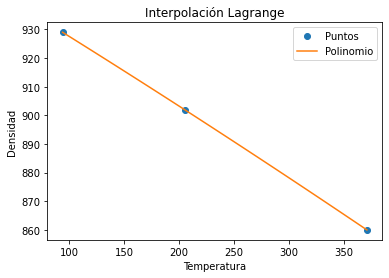

Polinomio de Lagrange:


-3.52664438611136e-5*x**2 - 0.232698576528769*x + 951.185280491661

In [5]:
##Elaboración de la función de lagrange
x = sym.Symbol('x')
polinomio = 0

for i in range(0,n,1):  
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])   
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador                #------> funcion de lagrange
    polinomio = polinomio + terminoLi*fi[i]          #-----> polinomio de lagrange

polisimple = polinomio.expand()
px = sym.lambdify(x,polisimple)

a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,101)
pfi = px(pxi)

## Elaboración de la gráfica 

plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel(eje_x)
plt.ylabel(eje_y)
plt.title('Interpolación Lagrange')
plt.show() 

print('Polinomio de Lagrange:')
polisimple
            

In [7]:
## Evaluación del punto a calcular

x_evaluado = float(input('Ingrese el valor ha evaluar: '))
P_evaluado = polinomio.subs(x,x_evaluado).evalf(4)
print('P({}) = {}'.format(x_evaluado,P_evaluado.evalf(5)))

Ingrese el valor ha evaluar:  251


P(251.0) = 890.55


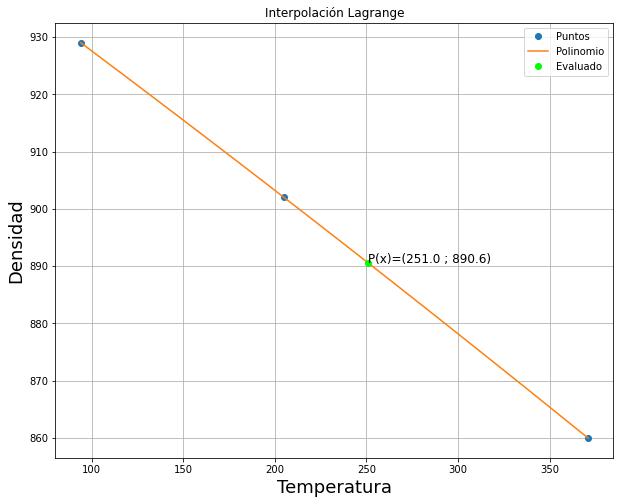

In [8]:
##Obtención de la gráfica mediante el punto evaluado

plt.figure(figsize=(10,8))
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.plot(x_evaluado,P_evaluado,'o',color='lime',label = 'Evaluado')
plt.annotate('P(x)=({} ; {})'.format(x_evaluado,P_evaluado),
            xy=(x_evaluado,P_evaluado),
            xycoords = 'data',
            fontsize = 12)
plt.legend()
plt.grid()
plt.xlabel(eje_x,size='18')
plt.ylabel(eje_y,size='18')
plt.title('Interpolación Lagrange')
plt.show() 

## Con la libreria SCIPY

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [10]:
## Toma de datos o valores 

n = int(input('Ingrese la cantidad de pares de datos: '))

X = np.array([])
Y = np.array([])

for i in np.arange(0,n):
    Xi = float(input('Datos x{}: '.format(i+1)))
    X= np.append(X,Xi)
    Yi = float(input('Datos y{}: '.format(i+1)))
    Y= np.append(Y,Yi)   

Ingrese la cantidad de pares de datos:  3
Datos x1:  94
Datos y1:  929
Datos x2:  205
Datos y2:  902
Datos x3:  371
Datos y3:  860


[]

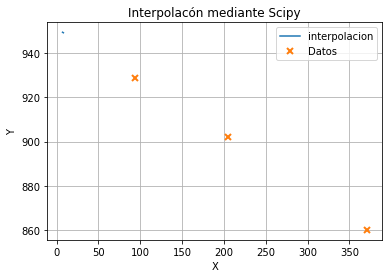

In [15]:
# Importación de Lagrange mediante la librería SCIPY
p = lagrange(X,Y)
x1 = np.linspace(7,8,100)
y1 = p(x1)

plt.plot(x1,y1,label='interpolacion')
plt.plot(X,Y,'x',mew=2,label='Datos')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.title('Interpolacón mediante Scipy')
plt.plot()

In [13]:
(p(251))

890.5561165532451

In [16]:
# Calculo del error obtenido

A=float(input('ingrese el valor obtenido de forma analítica'))
N=float(input('ingrese el valor obtenido de forma numérica'))

ingrese el valor obtenido de forma analítica 890.5
ingrese el valor obtenido de forma numérica 890.55


In [34]:
Error=(abs(A-N)/A)*100


In [35]:
print('Error porcentual= {} %'.format(Error))

Error porcentual= 0.005614823133066202 %
